# Toy Example2 (self loop)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

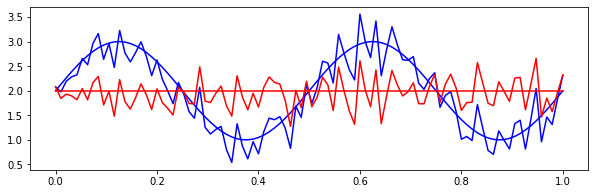

In [3]:
t = np.linspace(0,1,96)
noise = np.random.normal(0, 0.3, len(t))
x1 = np.sin(4*np.pi*t) + 2
x2 = x1 + noise
x3 = 0*np.cos(4*np.pi*t) + 2
x4 = x3 + noise
plt.figure(figsize=(10,3))
plt.plot(t,x1, color='blue')
plt.plot(t,x2, color='blue')
plt.plot(t,x3, color='red')
plt.plot(t,x4, color='red')
plt.show()

In [17]:
X = pd.DataFrame(np.ones((96,4)))
X.iloc[:,0]=x1
X.iloc[:,1]=x2
X.iloc[:,2]=x3
X.iloc[:,3]=x4

In [18]:
X = X.rename(columns={0:'node1', 1:'node2', 2:'node3', 3:'node4'})

In [20]:
cor1 = X.corr()

In [27]:
cor1 = cor1.fillna(0)
cor1 = round(cor1,4)
cor1

,node1,node2,node3,node4
node1,1.0000,0.9318,0.0,-0.0938
node2,0.9318,1.0000,0.0,0.2739
node3,0.0000,0.0000,0.0,0.0000
node4,-0.0938,0.2739,0.0,1.0000


In [31]:
cor2 = pd.DataFrame({'node1':[1.0000,0.0000,0.9318,-0.0938], 'node2':[0.0000, 1.0000, -0.0087, 0.9318], 'node3':[0.9318,-0.0087, 1.0000, 0.0000], 'node4':[-0.0938,0.9318,0.0000,1.0000]})
cor2

,node1,node2,node3,node4
0,1.0000,0.0000,0.9318,-0.0938
1,0.0000,1.0000,-0.0087,0.9318
2,0.9318,-0.0087,1.0000,0.0000
3,-0.0938,0.9318,0.0000,1.0000


<Axes: >

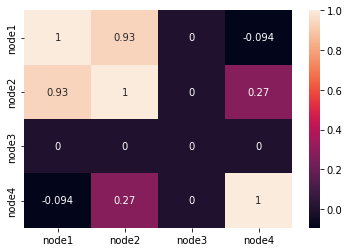

In [32]:
sns.heatmap(cor1, annot=True)

<Axes: >

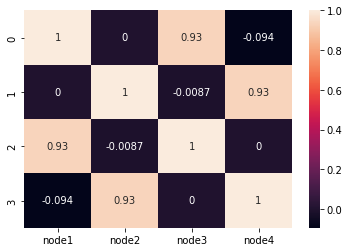

In [33]:
sns.heatmap(cor2, annot=True)

## LRNR

In [5]:
import eptstgcn
import torch
import pandas as pd
import numpy as np
import gc

In [6]:
import importlib
importlib.reload(eptstgcn)

<module 'eptstgcn' from '/home/jy/Dropbox/noteda/posts/SOLAR/eptstgcn/__init__.py'>

In [7]:
url1 = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/toy_example2/data/self_loop/normal.json'
loader1 = eptstgcn.DatasetLoader(url1)
dataset1 = loader1.get_dataset(lags=4)
train_dataset, test_dataset = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.7)

In [8]:
url2 = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/toy_example2/data/self_loop/abnormal.json'
loader2 = eptstgcn.DatasetLoader(url2)
dataset2 = loader2.get_dataset(lags=4)
train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.7)

In [9]:
lrnr = eptstgcn.StgcnLearner(train_dataset, dataset_name = 'ver1')
lrnr2 = eptstgcn.StgcnLearner(train_dataset2, dataset_name = 'ver2')

/home/jy/Dropbox/noteda/posts/SOLAR/eptstgcn/learners.py:50: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402421473/work/torch/csrc/utils/tensor_new.cpp:245.)
  self.lags = torch.tensor(train_dataset.features).shape[-1]


In [10]:
lrnr.learn(filters=32, epoch=50)

In [11]:
lrnr2.learn(filters=32, epoch=50)

## VISUALIZATION

|구분|mse(train)|mse(test)|
|:---|:---------|:--------|
|가중치 잘 준 버전|0.22|0.38|
|가중치 이상하게|0.49|1.07|
||||
|가중치 잘 준 버전(+self-loop)|0.08|0.14|
|가중치 이상하게(+self-loop)|0.33|0.78|


### VER1.노드1,2 // 노드3,4 -- 가중치 제대로

#### TRAIN

In [13]:
evtor1 = eptstgcn.ToyEvaluator(lrnr, train_dataset, test_dataset)
evtor2 = eptstgcn.ToyEvaluator(lrnr2, train_dataset2, test_dataset2)

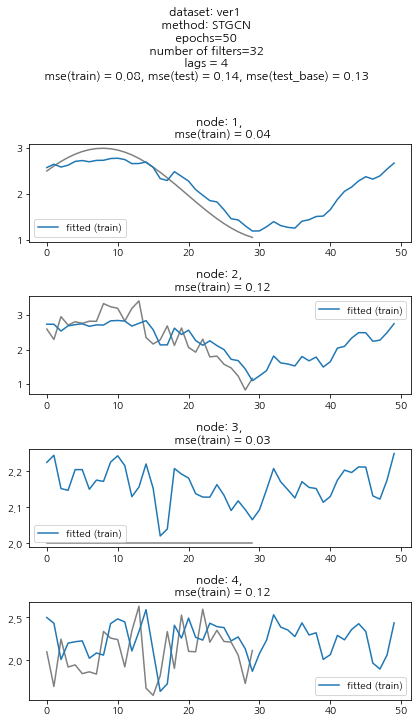

In [14]:
evtor1.tr_plot(t=50)

In [15]:
np.array(test_dataset.features).shape

(28, 4, 4)

#### TEST

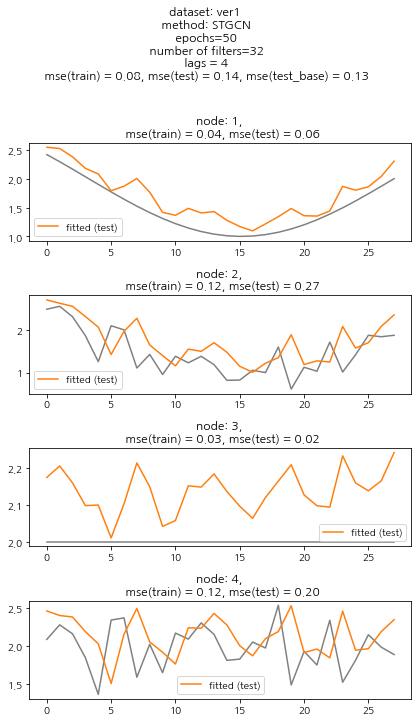

In [16]:
evtor1.test_plot(t=28)

### VER2. 노드1,3 // 노드2,4 -- 가중치 임의로 바꿔서

#### TRAIN

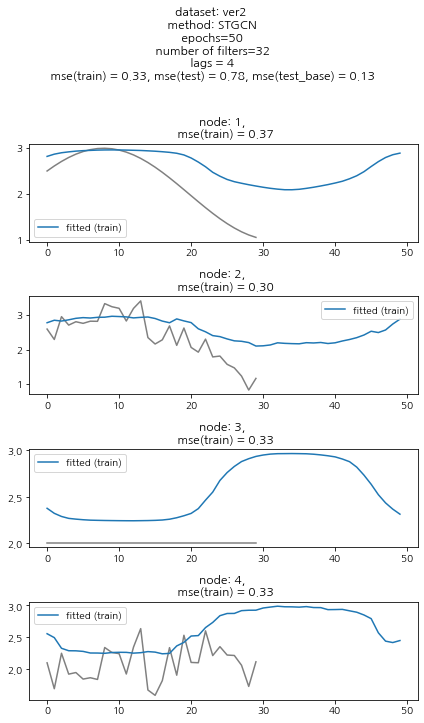

In [17]:
evtor2.tr_plot(t=50)

#### TEST

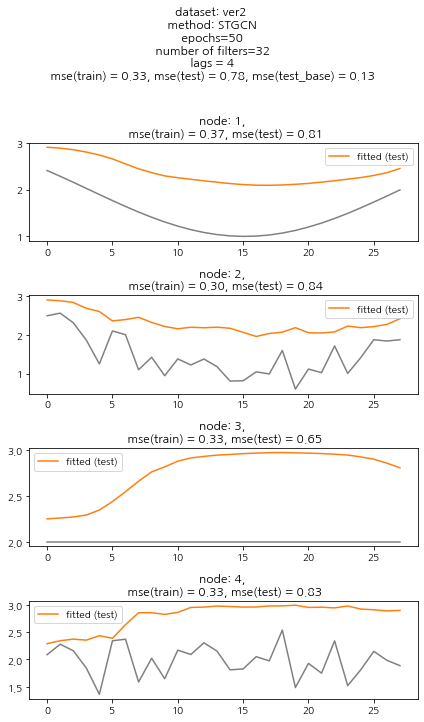

In [18]:
evtor2.test_plot(t=28)